Importing the dataset

In [ ]:
import pandas as pd
new_dataset = pd.DataFrame()
dataset = pd.read_csv('/content/cod.csv')
new_dataset['level']=dataset.pop('level')
new_dataset['wins']=dataset.pop('wins')
print(new_dataset)

      level  wins
0         1     0
1         1     0
2         9     0
3         1     3
4         1     0
...     ...   ...
1553     10     0
1554      1     0
1555      1     0
1556      1     0
1557      5     1

[1558 rows x 2 columns]


Splitting the dataset as train and test

In [ ]:
X = new_dataset.values
Y = new_dataset.pop('wins').values

X_train=X[0:1400]
Y_train=Y[0:1400]
X_test=X[:100]
Y_test=Y[:100]

print(X_train)
print(Y_test)


[[  1   0]
 [  1   0]
 [  9   0]
 ...
 [ 20  64]
 [  2   0]
 [ 53 183]]
[   0    0    0    3    0  684    4  186  741   26    0    0  188    0
   15  207  106 1592  190  605    0   35   51    0   42    0  349   59
   81    0    7    7    0    0   21   80  152   20    1  642    0    3
   57    0   23  536  127  244   74    0    0   51    0   17   40   24
  136  108  150    0    1  101    0  504  601    0    0    0    0    0
  225    2    1   35  251    0  115    0  758  230  283    2   34    0
   70  724   44   93    0  655   12    0    0   30    2   74   29  157
    0   25]


Normalizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
X_train=scx.fit_transform(X)
X_test=scx.fit_transform(X)

print(X_test[:5])

[[-0.63568215 -0.50681925]
 [-0.63568215 -0.50681925]
 [-0.51854521 -0.50681925]
 [-0.63568215 -0.49688179]
 [-0.63568215 -0.50681925]]


Finding the optimal value of k in KMeans with Elbow Method


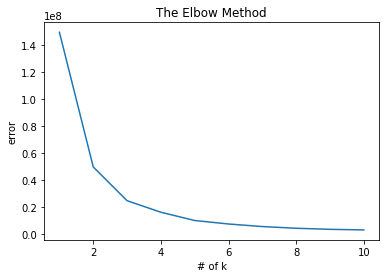

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=42)
    kmeans.fit(X)
    error.append(kmeans.inertia_)
plt.plot(range(1, 11), error)
plt.title('The Elbow Method')
plt.xlabel('# of k')
plt.ylabel('error')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(X=X_test)

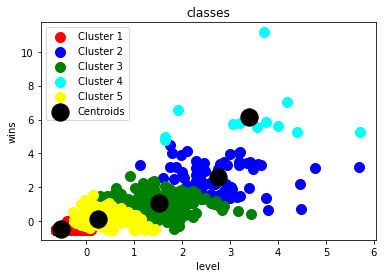

In [ ]:
plt.scatter(X_test[y == 0, 0], X_test[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y == 1, 0], X_test[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test[y == 2, 0], X_test[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test[y == 3, 0], X_test[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_test[y == 4, 0], X_test[y == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('classes')
plt.xlabel('level')
plt.ylabel('wins')
plt.legend()
plt.show()

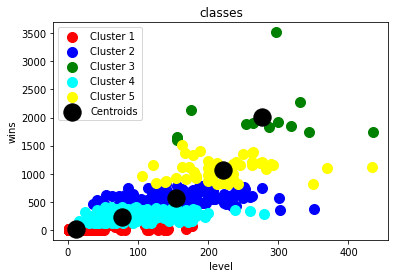

In [ ]:
y=kmeans.fit_predict(X=X)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('classes')
plt.xlabel('level')
plt.ylabel('wins')
plt.legend()
plt.show()

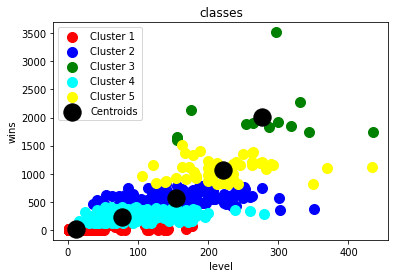

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('classes')
plt.xlabel('level')
plt.ylabel('wins')
plt.legend()
plt.show()